In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

In [2]:
alternatives = pd.read_csv('data/Alternatives etfs_details_type_fund_flow.csv').set_index('Symbol')
bonds = pd.read_csv('data/Bonds etfs_details_type_fund_flow.csv').set_index('Symbol')
commodity = pd.read_csv('data/Commodity etfs_details_type_fund_flow.csv').set_index('Symbol')
equity = pd.read_csv('data/Equity etfs_details_type_fund_flow.csv').set_index('Symbol')
multi_asset = pd.read_csv('data/Multi Asset etfs_details_type_fund_flow.csv').set_index('Symbol')

In [3]:
alternatives.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change,Avg. Daily Volume,Previous Closing Price,1-Day Change,Inverse,Leveraged,1 Week,...,Returns Rating,Volatility Rating,Dividend Rating,Concentration Rating,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
Symbol,,,,,,,,,,,,,,,,,,,,,
FTLS,First Trust Long/Short Equity ETF,Alternatives,"1,152,310,000",7.17%,"130,705",60.17,0.75%,No,False,1.88%,...,A-,B+,B-,NaN,6.35,42.55%,45.51%,85.76,4.91%,6.62%
DBMF,iMGP DBi Managed Futures Strategy ETF,Alternatives,"1,024,650,000",17.91%,"328,453",30.21,2.44%,No,False,3.25%,...,NaN,B+,B,NaN,0.00,NaN,NaN,NaN,NaN,NaN
RLY,SPDR SSgA Multi-Asset Real Return ETF,Alternatives,"579,914,000",3.73%,"124,186",28.20,-0.04%,No,False,0.98%,...,B+,B+,A-,B+,6.68,70.95%,58.03%,475.90,9.74%,2.23%
QAI,IQ Hedge Multi-Strategy Tracker ETF,Alternatives,"566,685,000",1.93%,"102,177",30.68,0.49%,No,False,0.92%,...,B+,A,A,C+,6.37,33.33%,46.09%,151.34,2.80%,2.90%
KMLM,KFA Mount Lucas Managed Futures Index Strategy...,Alternatives,"279,752,000",7.95%,"98,075",31.11,0.39%,No,False,0.03%,...,NaN,B-,C+,NaN,0.00,NaN,NaN,NaN,NaN,NaN


In [4]:
print(alternatives.shape)
print(bonds.shape)
print(commodity.shape)
print(equity.shape)
print(multi_asset.shape)

(49, 52)
(657, 52)
(95, 52)
(2386, 52)
(152, 52)


In [5]:
alternatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, FTLS to HYKE
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ETF Name                                   49 non-null     object 
 1   Asset Class                                33 non-null     object 
 2   Total Assets                               49 non-null     object 
 3   YTD Price Change                           46 non-null     object 
 4   Avg. Daily Volume                          48 non-null     object 
 5   Previous Closing Price                     49 non-null     float64
 6   1-Day Change                               49 non-null     object 
 7   Inverse                                    49 non-null     object 
 8   Leveraged                                  49 non-null     bool   
 9   1 Week                                     49 non-null     object 
 10  1 Month                     

In [6]:
#fix missing asset class names

display(alternatives[alternatives['Asset Class'].isnull()])

,ETF Name,Asset Class,Total Assets,YTD Price Change,Avg. Daily Volume,Previous Closing Price,1-Day Change,Inverse,Leveraged,1 Week,...,Returns Rating,Volatility Rating,Dividend Rating,Concentration Rating,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
Symbol,,,,,,,,,,,,,,,,,,,,,
EQLS,Simplify Market Neutral Equity Long/Short ETF,NaN,"159,187,000",3.99%,"32,677",23.14,-0.64%,No,False,-2.20%,...,NaN,B+,A,NaN,0.00,NaN,NaN,NaN,NaN,NaN
RSST,Return Stacked U.S. Stocks & Managed Futures ETF,NaN,"118,451,000",16.92%,"57,542",23.63,2.78%,No,False,5.12%,...,NaN,A,B,NaN,6.50,44.14%,50.34%,89.45,7.46%,3.62%
QIS,Simplify Multi-QIS Alternative ETF,NaN,"115,026,000",2.99%,"7,433",25.45,-0.66%,No,False,0.64%,...,NaN,B-,A-,NaN,0.00,NaN,NaN,NaN,NaN,NaN
PRMN,PlanRock Market Neutral Income ETF,NaN,"66,944,100",0.51%,420,29.83,-0.50%,No,False,-0.04%,...,NaN,NaN,C+,NaN,0.00,NaN,NaN,NaN,NaN,NaN
FIAX,Nicholas Fixed Income Alternative ETF,NaN,"61,617,800",-0.37%,"28,309",19.15,0.42%,No,False,0.55%,...,C,C,A,NaN,5.86,20.62%,34.91%,1.61,0.00%,0.00%
RSBT,Return Stacked Bonds & Managed Futures ETF,NaN,"57,435,500",6.32%,"14,069",18.34,1.61%,No,False,2.63%,...,C,B+,B+,NaN,0.00,NaN,NaN,NaN,NaN,NaN
EHLS,Even Herd Long Short ETF,NaN,"43,618,800",NaN,NaN,19.78,1.02%,No,False,4.46%,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
TPMN,Timothy Plan Market Neutral ETF,NaN,"40,847,000",-2.20%,"8,180",23.67,-0.34%,No,False,-0.29%,...,C,C+,A,NaN,6.53,0.00%,51.24%,522.38,7.98%,4.89%
HFND,Unlimited HFND Multi-Strategy Return Tracker ETF,NaN,"36,621,800",2.14%,"12,880",21.26,-0.09%,No,False,0.88%,...,C+,B-,B+,NaN,6.29,27.93%,44.01%,174.36,5.78%,4.17%


In [7]:
display(alternatives[alternatives['1 Year'].isnull()]['1 Year'])

Symbol
EQLS    NaN
RSST    NaN
QIS     NaN
PRMN    NaN
EHLS    NaN
HF      NaN
LSEQ    NaN
USE     NaN
TRES    NaN
FFLS    NaN
HYKE    NaN
Name: 1 Year, dtype: object

In [8]:
#fix missing asset class names

alternatives[['Asset Class']] = alternatives[['Asset Class']].fillna('Alternatives')

In [9]:
#drop non-useful columns and fillnas

cols_to_drop = ['Inverse', 'Leveraged', \
                '% In Top 10','Commission Free',\
                'ST Cap Gain Rate', 'LT Cap Gain Rate', \
                'Liquidity Rating', 'Expenses Rating', \
                'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
                'Concentration Rating', 'Carbon Intensity (Tons of CO2e / M Sales)', \
                'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
                'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

alternatives_reduced = alternatives.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})
#alternatives_reduced = alternatives.drop(cols_to_drop, axis=1).fillna({'YTD Price Change': value=np.nan, 'Avg. Daily Volume': value=np.nan, '1 Year': value=np.nan,'3 Year': value=np.nan,'5 Year': value=np.nan, 'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A', 'Dividend' : value=np.nan, 'ESG Score Peer Percentile (%)' : value=np.nan, 'ESG Score Global Percentile (%)' : value=np.nan})
alternatives_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, FTLS to HYKE
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ETF Name                         49 non-null     object 
 1   Asset Class                      49 non-null     object 
 2   Total Assets                     49 non-null     object 
 3   YTD Price Change                 46 non-null     object 
 4   Avg. Daily Volume                48 non-null     object 
 5   Previous Closing Price           49 non-null     float64
 6   1-Day Change                     49 non-null     object 
 7   1 Week                           49 non-null     object 
 8   1 Month                          49 non-null     object 
 9   1 Year                           38 non-null     object 
 10  3 Year                           22 non-null     object 
 11  5 Year                           13 non-null     object 
 12  YTD FF                  

In [10]:
# removing signs

percentage_cols = ['YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)'] 

alternatives_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = alternatives_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")

#alternatives_reduced[dollar_cols] = alternatives_reduced[dollar_cols].replace({'$':''}, regex=True)

alternatives_reduced = alternatives_reduced.replace({'%':'', ',':''}, regex=True)

alternatives_reduced

,ETF Name,Asset Class,Total Assets,YTD Price Change,Avg. Daily Volume,Previous Closing Price,1-Day Change,1 Week,1 Month,1 Year,...,Annual Dividend Rate,Dividend Date,Dividend,Annual Dividend Yield %,P/E Ratio,Beta,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%)
Symbol,,,,,,,,,,,,,,,,,,,,,
FTLS,First Trust Long/Short Equity ETF,Alternatives,1152310000,7.17,130705,60.17,0.75,1.88,-1.86,18.91,...,0.84,21/03/2024,0.13,1.41,0.04,0.51,283,6.35,42.55,45.51
DBMF,iMGP DBi Managed Futures Strategy ETF,Alternatives,1024650000,17.91,328453,30.21,2.44,3.25,6.69,17.66,...,0.91,26/03/2024,0.16,3.07,0.04,-0.14,3,0.00,<NA>,<NA>
RLY,SPDR SSgA Multi-Asset Real Return ETF,Alternatives,579914000,3.73,124186,28.2,-0.04,0.98,2.19,6.09,...,0.94,19/03/2024,0.03,3.32,0.04,0.70,13,6.68,70.95%,58.03%
QAI,IQ Hedge Multi-Strategy Tracker ETF,Alternatives,566685000,1.93,102177,30.68,0.49,0.92,-0.39,8.93,...,1.23,28/12/2023,1.23,4.02,0.05,0.30,55,6.37,33.33,46.09
KMLM,KFA Mount Lucas Managed Futures Index Strategy...,Alternatives,279752000,7.95,98075,31.11,0.39,0.03,3.98,0.52,...,0.0,28/12/2022,4.04,0.00,0.00,-0.35,7,0.00,<NA>,<NA>
MNA,IQ Merger Arbitrage ETF,Alternatives,279199000,-1.40,52030,30.97,0.58,0.42,-1.34,-1.35,...,0.38,28/12/2023,0.38,1.23,0.03,0.13,50,6.69,64.71,58.74
BTAL,AGF U.S. Market Neutral Anti-Beta Fund,Alternatives,267057000,10.68,262828,18.76,-1.42,-2.60,3.76,-5.43,...,1.04,27/12/2023,1.04,5.48,0.04,-0.51,400,0.00,<NA>,<NA>
WTMF,WisdomTree Managed Futures Strategy Fund,Alternatives,207565000,5.42,43928,36.97,0.74,0.38,-0.86,13.68,...,1.66,22/12/2023,0.34,4.50,0.00,0.09,1,5.86,46.67%,35.44%
CTA,Simplify Managed Futures Strategy ETF,Alternatives,184170000,17.90,60366,27.66,0.29,1.80,10.73,19.30,...,1.99,25/03/2024,0.15,7.19,0.00,2.34,9,0.00,<NA>,<NA>


In [11]:
# updating titles of % columns

#percentage_cols = ['YTD Price Change', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)'] 

alternatives_reduced = alternatives_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)



In [12]:
alternatives_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, FTLS to HYKE
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ETF Name                         49 non-null     object 
 1   Asset Class                      49 non-null     object 
 2   Total Assets                     49 non-null     string 
 3   YTD Price Change %               46 non-null     string 
 4   Avg. Daily Volume                48 non-null     string 
 5   Previous Closing Price           49 non-null     string 
 6   1-Day Change %                   49 non-null     string 
 7   1 Week Change %                  49 non-null     string 
 8   1 Month Change %                 49 non-null     string 
 9   1 Year Change %                  38 non-null     string 
 10  3 Year Change %                  22 non-null     string 
 11  5 Year Change %                  13 non-null     string 
 12  YTD FF                  

In [13]:
# converting numeric columns to float and integer

numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)'] 

alternatives_reduced[numeric_cols] = alternatives_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)
alternatives_reduced['# of Holdings'] = alternatives_reduced['# of Holdings'].astype(int)
alternatives_reduced.head()    

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,Annual Dividend Rate,Dividend Date,Dividend,Annual Dividend Yield %,P/E Ratio,Beta,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%)
Symbol,,,,,,,,,,,,,,,,,,,,,
FTLS,First Trust Long/Short Equity ETF,Alternatives,1.152310e+09,7.17,130705.0,60.17,0.75,1.88,1.86,18.91,...,0.84,21/03/2024,0.13,1.41,0.04,0.51,283,6.35,42.55,45.51
DBMF,iMGP DBi Managed Futures Strategy ETF,Alternatives,1.024650e+09,17.91,328453.0,30.21,2.44,3.25,6.69,17.66,...,0.91,26/03/2024,0.16,3.07,0.04,-0.14,3,0.00,NaN,NaN
RLY,SPDR SSgA Multi-Asset Real Return ETF,Alternatives,5.799140e+08,3.73,124186.0,28.20,0.04,0.98,2.19,6.09,...,0.94,19/03/2024,0.03,3.32,0.04,0.70,13,6.68,70.95,58.03
QAI,IQ Hedge Multi-Strategy Tracker ETF,Alternatives,5.666850e+08,1.93,102177.0,30.68,0.49,0.92,0.39,8.93,...,1.23,28/12/2023,1.23,4.02,0.05,0.30,55,6.37,33.33,46.09
KMLM,KFA Mount Lucas Managed Futures Index Strategy...,Alternatives,2.797520e+08,7.95,98075.0,31.11,0.39,0.03,3.98,0.52,...,0.00,28/12/2022,4.04,0.00,0.00,-0.35,7,0.00,NaN,NaN


In [14]:
alternatives_reduced.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, FTLS to HYKE
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ETF Name                         49 non-null     object 
 1   Asset Class                      49 non-null     object 
 2   Total Assets                     49 non-null     float64
 3   YTD Price Change %               46 non-null     float64
 4   Avg. Daily Volume                48 non-null     float64
 5   Previous Closing Price           49 non-null     float64
 6   1-Day Change %                   49 non-null     float64
 7   1 Week Change %                  49 non-null     float64
 8   1 Month Change %                 49 non-null     float64
 9   1 Year Change %                  38 non-null     float64
 10  3 Year Change %                  22 non-null     float64
 11  5 Year Change %                  13 non-null     float64
 12  YTD FF                  

In [15]:
# adding caluclated columns

alternatives_reduced['1 Day Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1-Day Change %'] / 100) + 1)
alternatives_reduced['1 Week Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Week Change %'] / 100) + 1)
alternatives_reduced['1 Month Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Month Change %'] / 100) + 1)
alternatives_reduced['1 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Year Change %'] / 100) + 1)
alternatives_reduced['3 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['3 Year Change %'] / 100) + 1)
alternatives_reduced['5 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['5 Year Change %'] / 100) + 1)
alternatives_reduced.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
FTLS,First Trust Long/Short Equity ETF,Alternatives,1.152310e+09,7.17,130705.0,60.17,0.75,1.88,1.86,18.91,...,283,6.35,42.55,45.51,59.722084,59.059678,59.071274,50.601295,54.954790,54.934721
DBMF,iMGP DBi Managed Futures Strategy ETF,Alternatives,1.024650e+09,17.91,328453.0,30.21,2.44,3.25,6.69,17.66,...,3,0.00,NaN,NaN,29.490433,29.259080,28.315681,25.675676,27.486125,NaN
RLY,SPDR SSgA Multi-Asset Real Return ETF,Alternatives,5.799140e+08,3.73,124186.0,28.20,0.04,0.98,2.19,6.09,...,13,6.68,70.95,58.03,28.188725,27.926322,27.595655,26.581205,26.137733,26.169265
QAI,IQ Hedge Multi-Strategy Tracker ETF,Alternatives,5.666850e+08,1.93,102177.0,30.68,0.49,0.92,0.39,8.93,...,55,6.37,33.33,46.09,30.530401,30.400317,30.560813,28.164877,30.509149,29.978503
KMLM,KFA Mount Lucas Managed Futures Index Strategy...,Alternatives,2.797520e+08,7.95,98075.0,31.11,0.39,0.03,3.98,0.52,...,7,0.00,NaN,NaN,30.989142,31.100670,29.919215,30.949065,28.333333,NaN


In [16]:
# all code in one cell

# alternatives[['Asset Class']] = alternatives[['Asset Class']].fillna('Alternatives')

# cols_to_drop = ['Inverse', 'Leveraged', \
#                 '% In Top 10','Commission Free',\
#                 'ST Cap Gain Rate', 'LT Cap Gain Rate', \
#                 'Liquidity Rating', 'Expenses Rating', \
#                 'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
#                 'Concentration Rating', 'Carbon Intensity (Tons of CO2e / M Sales)', \
#                 'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
#                 'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

# alternatives_reduced = alternatives.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})

# alternatives_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = alternatives_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")
# alternatives_reduced = alternatives_reduced.replace({'%':'', ',':''}, regex=True)

# alternatives_reduced = alternatives_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)

# numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)'] 
# alternatives_reduced[numeric_cols] = alternatives_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)
# alternatives_reduced['# of Holdings'] = alternatives_reduced['# of Holdings'].astype(int)

# alternatives_reduced['1 Day Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1-Day Change %'] / 100) + 1)
# alternatives_reduced['1 Week Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Week Change %'] / 100) + 1)
# alternatives_reduced['1 Month Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Month Change %'] / 100) + 1)
# alternatives_reduced['1 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['1 Year Change %'] / 100) + 1)
# alternatives_reduced['3 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['3 Year Change %'] / 100) + 1)
# alternatives_reduced['5 Year Price'] = alternatives_reduced['Previous Closing Price'] / ((alternatives_reduced['5 Year Change %'] / 100) + 1)


In [17]:
#  bonds

bonds[['Asset Class']] = bonds[['Asset Class']].fillna('Bond')

cols_to_drop = ['Inverse', 'Leveraged', \
                '% In Top 10','Commission Free',\
                'ST Cap Gain Rate', 'LT Cap Gain Rate', \
                'Liquidity Rating', 'Expenses Rating', \
                'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
                'Concentration Rating', 'Carbon Intensity (Tons of CO2e / $M Sales)', \
                'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
                'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

bonds_reduced = bonds.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})

bonds_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = bonds_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")
bonds_reduced = bonds_reduced.replace({'%':'', ',':''}, regex=True)

bonds_reduced = bonds_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)

numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)', '# of Holdings'] 
bonds_reduced[numeric_cols] = bonds_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)

bonds_reduced['1 Day Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['1-Day Change %'] / 100) + 1)
bonds_reduced['1 Week Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['1 Week Change %'] / 100) + 1)
bonds_reduced['1 Month Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['1 Month Change %'] / 100) + 1)
bonds_reduced['1 Year Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['1 Year Change %'] / 100) + 1)
bonds_reduced['3 Year Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['3 Year Change %'] / 100) + 1)
bonds_reduced['5 Year Price'] = bonds_reduced['Previous Closing Price'] / ((bonds_reduced['5 Year Change %'] / 100) + 1)
bonds_reduced.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
AGG,iShares Core U.S. Aggregate Bond ETF,Bond,1.049480e+11,3.10,9217604.0,95.33,0.22,0.05,2.08,0.88,...,11572.0,6.15,53.58,40.85,95.120734,95.282359,93.387539,94.498414,92.044028,95.206232
BND,Vanguard Total Bond Market ETF,Bond,1.038150e+11,3.00,8147244.0,70.73,0.23,0.08,2.03,0.77,...,17882.0,6.15,54.72,40.92,70.567694,70.673461,69.322748,70.189541,68.305167,70.680524
BNDX,Vanguard Total International Bond ETF,Bond,5.335840e+10,1.35,4377358.0,48.44,0.27,0.31,1.03,4.39,...,6778.0,6.65,75.91,56.90,48.309564,48.290300,47.946155,46.402912,47.383351,48.420632
VCIT,Vanguard Intermediate-Term Corporate Bond ETF,Bond,4.491500e+10,2.51,7661431.0,78.41,0.24,0.22,1.93,2.07,...,2159.0,6.58,58.82,53.75,78.222267,78.237877,76.925341,76.819830,76.393219,77.533867
TLT,iShares 20+ Year Treasury Bond ETF,Bond,4.472440e+10,9.90,41397256.0,88.24,0.52,1.02,5.33,12.67,...,44.0,5.86,83.75,35.44,87.783526,87.349040,83.774803,78.317210,78.792749,84.577782


In [18]:
#  equities

equity[['Asset Class']] = equity[['Asset Class']].fillna('Equity')

cols_to_drop = ['Inverse', 'Leveraged', \
                '% In Top 10','Commission Free',\
                'ST Cap Gain Rate', 'LT Cap Gain Rate', \
                'Liquidity Rating', 'Expenses Rating', \
                'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
                'Concentration Rating', 'Carbon Intensity (Tons of CO2e / $M Sales)', \
                'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
                'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

equity_reduced = equity.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})

equity_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = equity_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")
equity_reduced = equity_reduced.replace({'%':'', ',':''}, regex=True)

equity_reduced = equity_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)

numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)', '# of Holdings'] 
equity_reduced[numeric_cols] = equity_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)

equity_reduced['1 Day Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['1-Day Change %'] / 100) + 1)
equity_reduced['1 Week Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['1 Week Change %'] / 100) + 1)
equity_reduced['1 Month Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['1 Month Change %'] / 100) + 1)
equity_reduced['1 Year Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['1 Year Change %'] / 100) + 1)
equity_reduced['3 Year Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['3 Year Change %'] / 100) + 1)
equity_reduced['5 Year Price'] = equity_reduced['Previous Closing Price'] / ((equity_reduced['5 Year Change %'] / 100) + 1)
equity_reduced.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
SPY,SPDR S&P 500 ETF Trust,Equity,5.034250e+11,7.26,72796848.0,508.26,0.95,2.65,2.21,25.03,...,504.0,6.58,47.58,53.69,503.476969,495.138821,497.270326,406.510437,468.744812,447.687836
IVV,iShares Core S&P 500 ETF,Equity,4.358010e+11,7.28,5723847.0,510.77,0.98,2.66,2.20,25.16,...,504.0,6.58,46.30,53.57,505.813032,497.535554,499.774951,408.093640,470.799152,449.542334
VOO,Vanguard S&P 500 ETF,Equity,4.267090e+11,7.31,5565156.0,467.21,1.00,2.66,2.25,25.21,...,505.0,6.58,48.27,53.77,462.584158,455.104228,456.929095,373.141123,430.608295,411.276408
VTI,Vanguard Total Stock Market ETF,Equity,3.761450e+11,6.51,3172552.0,251.78,0.93,2.67,2.38,25.00,...,3668.0,6.44,22.06,48.21,249.460022,245.232298,245.926939,201.424000,236.102776,223.209220
QQQ,Invesco QQQ Trust Series I,Equity,2.481550e+11,5.38,45948724.0,431.00,1.54,3.94,3.09,35.44,...,102.0,6.60,53.21,54.51,424.463266,414.662305,418.081288,318.222091,395.485410,363.590349


In [19]:
#  commodities

commodity[['Asset Class']] = commodity[['Asset Class']].fillna('Commodity')

cols_to_drop = ['Inverse', 'Leveraged', \
                '% In Top 10','Commission Free',\
                'ST Cap Gain Rate', 'LT Cap Gain Rate', \
                'Liquidity Rating', 'Expenses Rating', \
                'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
                'Concentration Rating', 'Carbon Intensity (Tons of CO2e / $M Sales)', \
                'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
                'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

commodity_reduced = commodity.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})

commodity_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = commodity_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")
commodity_reduced = commodity_reduced.replace({'%':'', ',':''}, regex=True)

commodity_reduced = commodity_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)

numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)', '# of Holdings'] 
commodity_reduced[numeric_cols] = commodity_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)

commodity_reduced['1 Day Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['1-Day Change %'] / 100) + 1)
commodity_reduced['1 Week Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['1 Week Change %'] / 100) + 1)
commodity_reduced['1 Month Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['1 Month Change %'] / 100) + 1)
commodity_reduced['1 Year Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['1 Year Change %'] / 100) + 1)
commodity_reduced['3 Year Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['3 Year Change %'] / 100) + 1)
commodity_reduced['5 Year Price'] = commodity_reduced['Previous Closing Price'] / ((commodity_reduced['5 Year Change %'] / 100) + 1)
commodity_reduced.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
GLD,SPDR Gold Shares,Commodity,6.202170e+10,13.31,8458477.0,216.62,0.32,2.00,7.78,17.25,...,1.0,0.0,NaN,NaN,215.929027,212.372549,200.983485,184.750533,198.388131,192.670995
IAU,iShares Gold Trust,Commodity,2.851780e+10,13.40,7213647.0,44.26,0.34,1.95,7.82,17.43,...,1.0,0.0,NaN,NaN,44.110026,43.413438,41.049898,37.690539,40.464436,39.310774
SLV,iShares Silver Trust,Commodity,1.172590e+10,14.28,26052512.0,24.89,0.68,5.00,10.23,8.74,...,1.0,0.0,NaN,NaN,24.721891,23.704762,22.580060,22.889461,24.636247,22.183601
GLDM,SPDR Gold MiniShares Trust,Commodity,7.353220e+09,13.37,4044039.0,46.38,0.28,2.05,7.76,17.57,...,1.0,0.0,NaN,NaN,46.250499,45.448310,43.040089,39.448839,42.367772,41.149854
PDBC,Invesco Optimum Yield Diversified Commodity St...,Commodity,5.135050e+09,7.44,3145122.0,14.29,0.00,0.99,3.25,6.32,...,5.0,0.0,NaN,NaN,14.290000,14.149916,13.840194,13.440557,12.721446,13.087279


In [20]:
#  multi asset

multi_asset[['Asset Class']] = multi_asset[['Asset Class']].fillna('Multi-Asset')

cols_to_drop = ['Inverse', 'Leveraged', \
                '% In Top 10','Commission Free',\
                'ST Cap Gain Rate', 'LT Cap Gain Rate', \
                'Liquidity Rating', 'Expenses Rating', \
                'Returns Rating', 'Volatility Rating', 'Dividend Rating', \
                'Concentration Rating', 'Carbon Intensity (Tons of CO2e / $M Sales)', \
                'Lower Bollinger', 'Upper Bollinger', 'Support 1', 'Resistance 1', 'RSI', \
                'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','Tax Form']

multi_asset_reduced = multi_asset.drop(cols_to_drop, axis=1).fillna({'ETF Database Category' : 'N/A', 'Dividend Date' : 'N/A'})

multi_asset_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']] = multi_asset_reduced[['Total Assets ', 'Previous Closing Price', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'Annual Dividend Rate', 'Dividend', 'YTD Price Change', 'Avg. Daily Volume', '1-Day Change', '1 Week', '1 Month', '1 Year', '3 Year', '5 Year', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)']].astype("string")
multi_asset_reduced = multi_asset_reduced.replace({'%':'', ',':''}, regex=True)

multi_asset_reduced = multi_asset_reduced.rename({'YTD Price Change' : 'YTD Price Change %', '1-Day Change' : '1-Day Change %', '1 Week' : '1 Week Change %', '1 Month' : '1 Month Change %', '1 Year' : '1 Year Change %', '3 Year' : '3 Year Change %', '5 Year' : '5 Year Change %'}, axis = 1)

numeric_cols = ['Total Assets ','YTD Price Change %', 'Avg. Daily Volume', 'Previous Closing Price', '1-Day Change %', '1 Week Change %', '1 Month Change %', '1 Year Change %', '3 Year Change %', '5 Year Change %', 'YTD FF', '1 Week FF', '4 Week FF', '1 Year FF', '3 Year FF', '5 Year FF', 'ER', 'Annual Dividend Rate', 'Dividend', 'Annual Dividend Yield %', 'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)', '# of Holdings'] 
multi_asset_reduced[numeric_cols] = multi_asset_reduced[numeric_cols].replace('[^\d.]', '', regex=True).astype(float)

multi_asset_reduced['1 Day Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['1-Day Change %'] / 100) + 1)
multi_asset_reduced['1 Week Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['1 Week Change %'] / 100) + 1)
multi_asset_reduced['1 Month Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['1 Month Change %'] / 100) + 1)
multi_asset_reduced['1 Year Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['1 Year Change %'] / 100) + 1)
multi_asset_reduced['3 Year Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['3 Year Change %'] / 100) + 1)
multi_asset_reduced['5 Year Price'] = multi_asset_reduced['Previous Closing Price'] / ((multi_asset_reduced['5 Year Change %'] / 100) + 1)
multi_asset_reduced.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
XYLD,Global X S&P 500 Covered Call ETF,Multi-Asset,2.791270e+09,4.71,412584.0,40.00,0.40,1.52,0.73,9.12,...,505.0,6.58,68.09,53.76,39.840637,39.401103,39.710116,36.656891,38.178868,37.839372
PTLC,Pacer Trendpilot US Large Cap ETF,Multi-Asset,2.622030e+09,7.21,146119.0,46.39,1.05,2.66,2.21,22.54,...,504.0,6.58,48.05,53.75,45.907966,45.187999,45.386948,37.857026,42.384651,42.168894
AOR,iShares Core Growth Allocation ETF,Multi-Asset,1.948350e+09,2.28,198208.0,54.19,0.71,1.61,1.73,11.11,...,9.0,6.51,41.88,50.46,53.807963,53.331365,53.268456,48.771488,53.326117,51.122642
AOA,iShares Core Aggressive Allocation ETF,Multi-Asset,1.811820e+09,3.72,89327.0,71.42,0.75,2.00,1.88,14.51,...,9.0,6.62,65.97,55.54,70.888337,70.019608,70.102081,62.370099,69.265833,66.252319
VRP,Invesco Variable Rate Preferred ETF,Multi-Asset,1.599790e+09,3.76,350964.0,23.52,0.17,0.64,0.80,13.00,...,307.0,6.23,8.99,42.60,23.480084,23.370429,23.333333,20.814159,23.033983,22.561151


In [21]:
# combining the cleaned data sets

combined = pd.concat([alternatives_reduced, bonds_reduced, equity_reduced, commodity_reduced, multi_asset_reduced], axis=0)
combined['Total Assets '] = combined['Total Assets '] / 1000000
print(combined.shape)
combined.sample(5)

(3339, 37)


,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
OBND,SPDR Loomis Sayles Opportunistic Bond ETF,Bond,36.83670,0.89,1148.0,25.52,0.12,0.37,1.07,5.32,...,447.0,0.00,NaN,NaN,25.489413,25.425924,25.249827,24.230915,NaN,NaN
TSLY,YieldMax TSLA Option Income Strategy ETF,Equity,688.20200,20.01,1413936.0,15.05,0.99,12.82,0.75,5.99,...,6.0,5.86,52.99,34.94,14.902466,13.339833,14.937965,14.199453,NaN,NaN
VALQ,American Century U.S. Quality Value ETF,Equity,208.49800,4.50,8103.0,55.30,0.14,0.50,3.71,18.58,...,232.0,6.89,83.29,66.90,55.222688,55.024876,53.321763,46.635183,52.110818,50.724638
FSST,Fidelity Sustainable U.S. Equity ETF,Equity,12.64640,8.43,2142.0,24.41,1.33,3.16,2.35,27.33,...,72.0,7.27,95.36,81.66,24.089608,23.662272,23.849536,19.170659,NaN,NaN
HYLG,Global X Health Care Covered Call & Growth ETF,Equity,2.71468,2.33,333.0,24.69,0.12,0.66,3.05,7.55,...,67.0,6.92,69.39,68.03,24.660408,24.528114,23.959243,22.956764,NaN,NaN


In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3339 entries, FTLS to CETF
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ETF Name                         3339 non-null   object 
 1   Asset Class                      3339 non-null   object 
 2   Total Assets                     3339 non-null   float64
 3   YTD Price Change %               3147 non-null   float64
 4   Avg. Daily Volume                3192 non-null   float64
 5   Previous Closing Price           3270 non-null   float64
 6   1-Day Change %                   3339 non-null   float64
 7   1 Week Change %                  3268 non-null   float64
 8   1 Month Change %                 3269 non-null   float64
 9   1 Year Change %                  2745 non-null   float64
 10  3 Year Change %                  2036 non-null   float64
 11  5 Year Change %                  1579 non-null   float64
 12  YTD FF                

In [23]:
# view for duplication

combined['ETF Name'].value_counts()

ETF Name
Two Roads Shared Trust                              2
John Hancock Preferred Income ETF                   2
Innovator US Equity Accelerated ETF                 2
First Trust Long/Short Equity ETF                   1
AdvisorShares Insider Advantage ETF                 1
                                                   ..
Fidelity MSCI Utilities Index ETF                   1
Innovator U.S. Equity Power Buffer ETF - January    1
ALPS Sector Dividend Dogs ETF                       1
Nuveen ESG Small-Cap ETF                            1
DriveWealth NYSE 100 Index ETF                      1
Name: count, Length: 3336, dtype: int64

In [24]:
display(combined[combined['ETF Name'] == 'Two Roads Shared Trust'])
#different symbol, leave in data

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
FDTB,Two Roads Shared Trust,Bond,8.59698,5.53,33480.0,9.56,0.00,0.10,1.54,NaN,...,9.0,5.97,45.75,37.39,9.560000,9.550450,9.415009,NaN,NaN,NaN
FDGR,Two Roads Shared Trust,Equity,1.14152,4.27,115245.0,11.60,1.67,3.58,3.09,NaN,...,6.0,6.42,19.27,47.50,11.409462,11.199073,11.252304,NaN,NaN,NaN


In [25]:
display(combined[combined['ETF Name'] == 'John Hancock Preferred Income ETF'])

# duplicates, remove one from data

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
JHPI,John Hancock Preferred Income ETF,Bond,36.9675,2.64,7230.0,21.9,0.0,0.22,1.64,10.58,...,124.0,6.01,28.75,37.99,21.9,21.851926,21.546635,19.804666,NaN,NaN
JHPI,John Hancock Preferred Income ETF,Preferred Stock,36.9675,2.64,7230.0,21.9,0.0,0.22,1.64,10.58,...,124.0,6.01,28.75,37.99,21.9,21.851926,21.546635,19.804666,NaN,NaN


In [26]:
display(combined[combined['ETF Name'] == 'Innovator US Equity Accelerated ETF'])
#different symbol, leave in data

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Symbol,,,,,,,,,,,,,,,,,,,,,
XDSQ,Innovator US Equity Accelerated ETF,Equity,45.88270,2.79,13475.0,30.42,1.20,2.90,2.55,12.79,...,3.0,0.0,NaN,NaN,30.059289,29.562682,29.663579,26.970476,28.968670,NaN
XDAP,Innovator US Equity Accelerated ETF,Equity,6.11658,0.43,2000.0,30.85,1.05,2.79,2.04,15.14,...,3.0,0.0,NaN,NaN,30.529441,30.012647,30.233242,26.793469,29.258346,NaN


In [27]:
# filter out JHPI preferred stock entry

combined = combined[combined['Asset Class'] != 'Preferred Stock']
display(combined.shape)

(3338, 37)

In [28]:
#load bokeh

from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter, CDSView, LinearAxis, Range1d

output_notebook()



Loading BokehJS ...

In [29]:
# performance over 1 and 5 year period

origin_colours = {'Equity':'#CE1141', 'Bond': 'orange', 'Multi-Asset': 'green', 'Commodity': 'purple', 'Alternatives': 'black'}
combined['colour_column'] = [origin_colours[x] for x in combined['Asset Class']]

onevsfive_year_perf = figure(tools='', tooltips=[('Fund', '@{ETF Name}'), ('1 Year Performance', '@{1 Year Change %} %'), ('5 Year Performance', '@{5 Year Change %} %')], \
                   width=800, height=600, \
                   y_axis_label='5 Year Performance (%)', x_axis_label='1 Year Performance (%)', \
                   title='1 vs 5 Year Performance by Asset Class')

onevsfive_year_perf.scatter(source=combined, x='1 Year Change %', y='5 Year Change %', \
                  fill_color='colour_column', size=8, \
                  legend_group='Asset Class')

show(onevsfive_year_perf)

In [30]:
# performance by Size

origin_colours = {'Equity':'#CE1141', 'Bond': 'orange', 'Multi-Asset': 'green', 'Commodity': 'purple', 'Alternatives': 'black'}
combined['colour_column'] = [origin_colours[x] for x in combined['Asset Class']]

assetsvsone_year_perf = figure(tools='', tooltips=[('Fund', '@{ETF Name}'), ('1 Year Performance', '@{1 Year Change %} %'), ('Size', '@{Total Assets }{1.1} Mn')], \
                   width=800, height=600, \
                   y_axis_label='1 Year Performance (%)', x_axis_label='Total Assets ($Mn)', \
                   title='Size vs 1 Year Performance by Asset Class')

assetsvsone_year_perf.scatter(source=combined, x='Total Assets ', y='1 Year Change %', \
                  fill_color='colour_column', size=8, \
                  legend_group='Asset Class')

assetsvsone_year_perf.x_range = Range1d(0, 510025)

show(assetsvsone_year_perf)

In [31]:
# assigning funds into performance buckets for 1 year returns

def performancebucket(x):
    if x < 5: 
        result = 'Low'
    elif x < 10 or x >= 5:
        result = 'Medium'
    else:
        result = 'High'
    return result


In [32]:
combined['Performance Bucket'] = combined['1 Year Change %'].apply(performancebucket)
combined.head()

,ETF Name,Asset Class,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,...,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price,colour_column,Performance Bucket
Symbol,,,,,,,,,,,,,,,,,,,,,
FTLS,First Trust Long/Short Equity ETF,Alternatives,1152.310,7.17,130705.0,60.17,0.75,1.88,1.86,18.91,...,42.55,45.51,59.722084,59.059678,59.071274,50.601295,54.954790,54.934721,black,Medium
DBMF,iMGP DBi Managed Futures Strategy ETF,Alternatives,1024.650,17.91,328453.0,30.21,2.44,3.25,6.69,17.66,...,NaN,NaN,29.490433,29.259080,28.315681,25.675676,27.486125,NaN,black,Medium
RLY,SPDR SSgA Multi-Asset Real Return ETF,Alternatives,579.914,3.73,124186.0,28.20,0.04,0.98,2.19,6.09,...,70.95,58.03,28.188725,27.926322,27.595655,26.581205,26.137733,26.169265,black,Medium
QAI,IQ Hedge Multi-Strategy Tracker ETF,Alternatives,566.685,1.93,102177.0,30.68,0.49,0.92,0.39,8.93,...,33.33,46.09,30.530401,30.400317,30.560813,28.164877,30.509149,29.978503,black,Medium
KMLM,KFA Mount Lucas Managed Futures Index Strategy...,Alternatives,279.752,7.95,98075.0,31.11,0.39,0.03,3.98,0.52,...,NaN,NaN,30.989142,31.100670,29.919215,30.949065,28.333333,NaN,black,Low


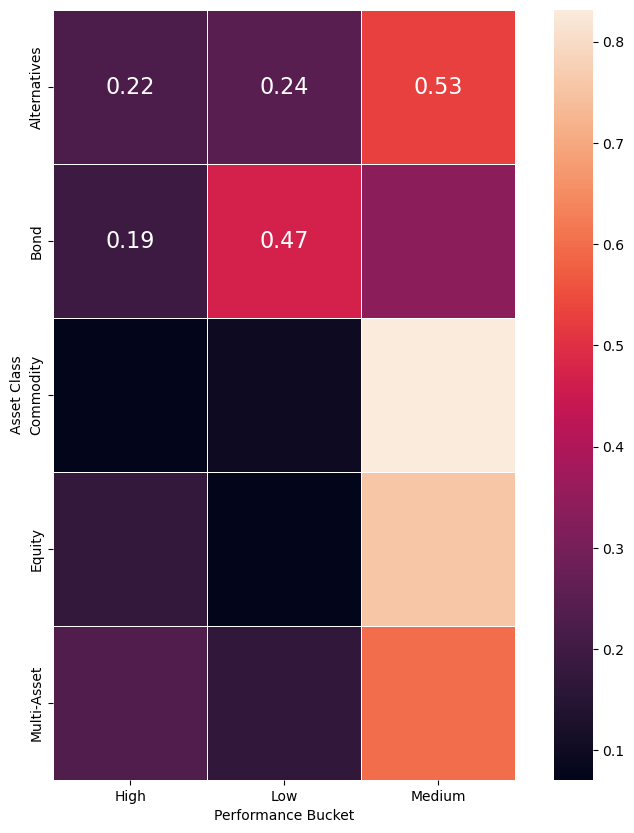

In [33]:
plt.figure(figsize=(10, 10))
heatmap = combined.groupby('Asset Class')['Performance Bucket'].value_counts(normalize=True).unstack()
sns.heatmap(heatmap, annot=True, fmt=".2f", annot_kws={"size": 16}, linewidths=.5, square=True);

In [34]:
# Correlation

corr = combined.corr(method='pearson', numeric_only = True)
corr

,Total Assets,YTD Price Change %,Avg. Daily Volume,Previous Closing Price,1-Day Change %,1 Week Change %,1 Month Change %,1 Year Change %,3 Year Change %,5 Year Change %,...,# of Holdings,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),1 Day Price,1 Week Price,1 Month Price,1 Year Price,3 Year Price,5 Year Price
Total Assets,1.000000,-0.010944,0.325520,0.475764,-0.008004,-0.005970,-0.020207,0.009940,-0.020296,0.032366,...,0.204641,0.070004,0.004690,0.024119,0.477801,0.479098,0.480715,0.492307,0.486148,0.496195
YTD Price Change %,-0.010944,1.000000,0.093012,0.026469,0.608040,0.617938,0.490664,0.604644,0.681141,0.545732,...,-0.109117,-0.113482,-0.088922,-0.044251,0.019400,0.011396,0.012007,-0.049333,0.010611,-0.023237
Avg. Daily Volume,0.325520,0.093012,1.000000,0.132226,0.124458,0.157482,0.129613,0.126087,0.109877,0.216146,...,0.060236,0.025921,0.006564,-0.035394,0.131751,0.130266,0.130373,0.122601,0.116109,0.104668
Previous Closing Price,0.475764,0.026469,0.132226,1.000000,0.005604,0.014588,-0.028692,0.124383,0.007759,0.133650,...,0.114491,0.137446,0.032176,0.054751,0.999847,0.999354,0.999424,0.979836,0.991528,0.996309
1-Day Change %,-0.008004,0.608040,0.124458,0.005604,1.000000,0.774144,0.546406,0.555471,0.438576,0.426859,...,-0.077260,0.016706,-0.113391,-0.069896,-0.004866,-0.013399,-0.008283,-0.067683,0.005752,-0.005451
1 Week Change %,-0.005970,0.617938,0.157482,0.014588,0.774144,1.000000,0.542189,0.561277,0.389031,0.453264,...,-0.091513,-0.004757,-0.077645,-0.021433,0.006394,-0.007708,0.001601,-0.052815,0.028146,0.009327
1 Month Change %,-0.020207,0.490664,0.129613,-0.028692,0.546406,0.542189,1.000000,0.364192,0.423919,0.380877,...,-0.091870,-0.062570,-0.097141,-0.137959,-0.033857,-0.039900,-0.052253,-0.079216,-0.051866,-0.068165
1 Year Change %,0.009940,0.604644,0.126087,0.124383,0.555471,0.561277,0.364192,1.000000,0.429299,0.593887,...,-0.110539,-0.036185,-0.068278,-0.052037,0.116902,0.107250,0.111182,0.006583,0.174906,0.163445
3 Year Change %,-0.020296,0.681141,0.109877,0.007759,0.438576,0.389031,0.423919,0.429299,1.000000,0.582222,...,-0.137767,-0.123354,-0.099774,-0.139372,0.004276,0.001587,-0.003007,-0.051502,-0.063608,-0.071762
5 Year Change %,0.032366,0.545732,0.216146,0.133650,0.426859,0.453264,0.380877,0.593887,0.582222,1.000000,...,-0.165474,-0.077899,0.006367,0.048051,0.129146,0.122606,0.124927,0.060441,0.106785,0.081571


<Axes: >

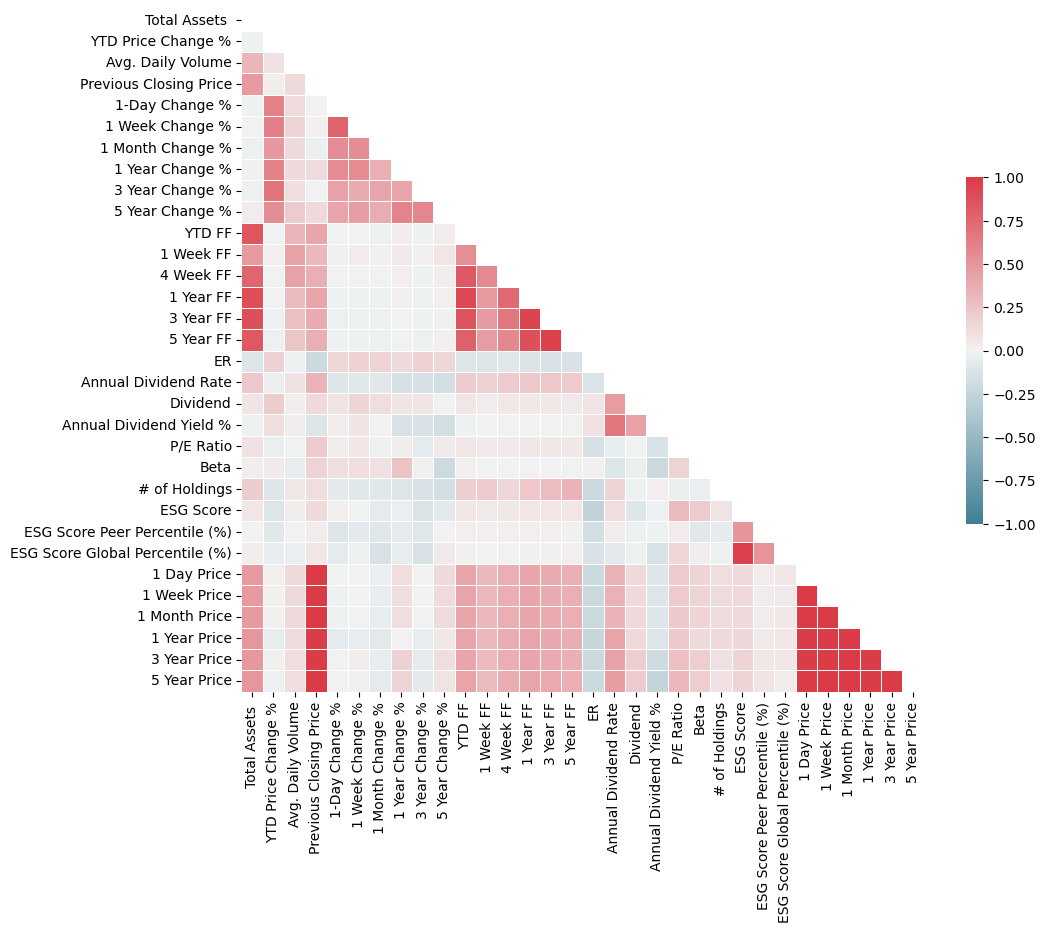

In [35]:
# visualising the correlation

mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax= 1,       # The maximum value of the legend. All higher vals will be same color
    vmin= -1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

In [39]:
#Top 100 funds by asset class

top_10_funds = combined.groupby('1 Year Change %')['Asset Class'].value_counts(ascending = False)[-100:].unstack()
top_10_funds

#netflix.groupby('region')['rating_category'].value_counts(normalize=True).unstack() * 100
# .plot(kind='scatter', color=base_colour, figsize=(10,8));

Asset Class,Alternatives,Bond,Commodity,Equity,Multi-Asset
1 Year Change %,,,,,
48.04,NaN,NaN,NaN,1.0,NaN
48.54,NaN,NaN,1.0,NaN,NaN
48.70,NaN,NaN,NaN,1.0,NaN
48.84,NaN,NaN,NaN,1.0,NaN
48.91,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...
195.74,NaN,NaN,NaN,1.0,NaN
217.49,NaN,NaN,NaN,1.0,NaN
264.28,NaN,NaN,NaN,1.0,NaN
